## This notebook must be run in your DeepLabCut(DLC)) environment
To run this notebook in your DLC environment, open the Anaconda Prompt, it is recommended to switch to the root of the directory by running this command >> cd c:\\

After this step run this command >> conda info --envs

Here you'd be able to see all the environments installed on your local machine, for example, Base, DeepLabCut, or SlEAP. Once you find your DLC environment(e.g. DeepLabCut), activate that environment using this command >> conda activate DeepLabCut 

Then run this command >> jupyter lab to open your jupyter lab IDE
If jupyter is not installed on your DLC environment, then you might need to run this command >> pip install jupyterlab

## DO **NOT* RUN THE NEXT CELL

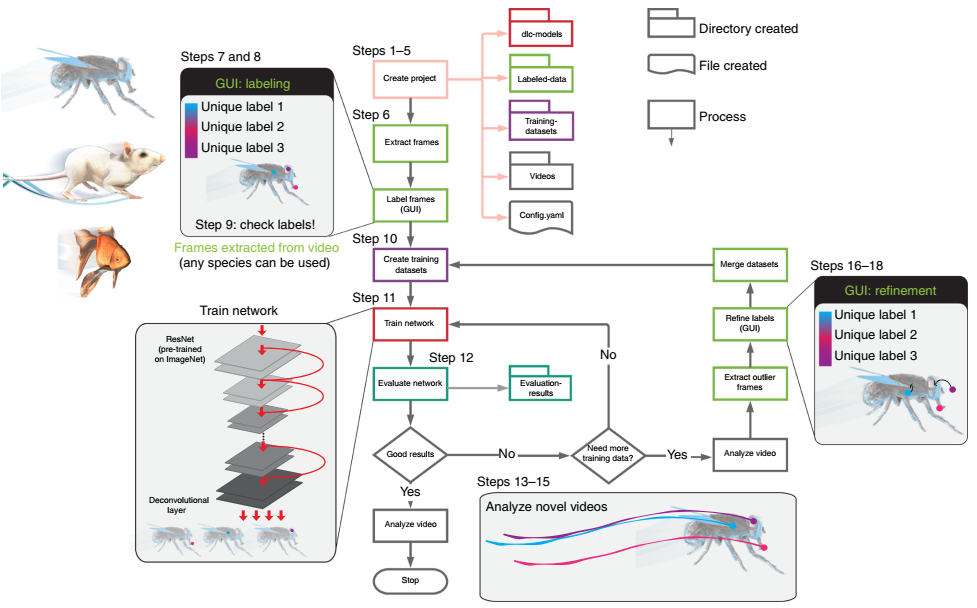

In [18]:
#Do NOT run this cell since it is getting a file from a local machine, not a link,# This cell shows the Workflow of DeepLabCut(DLC), the steps needed to train a network and extract coordinate data from novel videos
#In case you need more information, take a look at Nath, T., Mathis, A., Chen, A.C. et al. Using DeepLabCut for 3D markerless pose estimation across species and behaviors. Nat Protoc 14, 2152–2176 (2019). https://doi.org/10.1038/s41596-019-0176-0
from IPython.display import Image
#  Image(filename="C:\DLC_DIFE\DLC_pipeline.png")

In [1]:
#First we need to import DeeplabCut in this notebook using the command below, whenever you reopen this notebook or terminate a process in DLC, you need to re-run this cell
import deeplabcut

Loading DLC 2.3.5...


C:\ProgramData\Anaconda3\envs\DLCNDF\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#This code is just to ensure DLC is loaded, dir(deeplabcut) will show you all the functions available in DLC. You do not have to run this cell.
dir(deeplabcut)

['CropVideo',
 'DEBUG',
 'DownSampleVideo',
 'ShortenVideo',
 'SkeletonBuilder',
 'VERSION',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'add_new_videos',
 'adddatasetstovideolistandviceversa',
 'analyze_time_lapse_frames',
 'analyze_videos',
 'analyze_videos_converth5_to_csv',
 'analyze_videos_converth5_to_nwb',
 'analyzeskeleton',
 'auxfun_videos',
 'auxiliaryfunctions',
 'calibrate_cameras',
 'check_labels',
 'check_undistortion',
 'check_video_integrity',
 'comparevideolistsanddatafolders',
 'convert2_maDLC',
 'convert_detections2tracklets',
 'convertcsv2h5',
 'create_labeled_video',
 'create_labeled_video_3d',
 'create_multianimaltraining_dataset',
 'create_new_project',
 'create_new_project_3d',
 'create_pretrained_human_project',
 'create_pretrained_project',
 'create_project',
 'create_tracking_dataset',
 'create_training_dataset',
 'create_training_model_comparison',
 'create_vi

## Of course you need to change the directories and pathways defined in this notebook according to your local machine(your computer!)

In [14]:
#This cell creates a working directory for your project, I recommend creating your directory closer to the root of the pathway and keeping the name of videos short, in windows longer pathways and file names (e.g. more characters) might end up in an awkward situation where you'll face an error(too many characters) and eventually you have to relocate your directory.

#in a separate cell, you can run "deeplabcut.create_new_project?" (without quotation marks) to see what parameters you can pass to this function. basically, you need to define a project title, the name of the experimenter, a list of (pathways)videos, and the working directory where all data and folders are stored 

#note that in this script I am just using a single video, it is always recommended to use more videos to train the network
config_path=deeplabcut.create_new_project("DLC_DIFE_TEST","Hamid",["C:\DLC_DIFE\Mouse.mp4"],working_directory="C:\DLC_DIFE",copy_videos= False, multianimal= False)

Project "C:\DLC_DIFE\DLC_DIFE_TEST-Hamid-2023-09-04" already exists!


## Define body parts in the CONFIG file
Once the working directory is created (i.e. in the previous cell), go to the directory and find the file  **config.yaml** , you can simply open the file in a text editor such as Windows Notepad or other IDEs such as vscode. Define the body parts(Ears, nose, tail, etc) or objects or any particular thing in the video that you want to annotate(for example points for open and closed arms of the Elevate plus maze or points for an object in an open-field box).
**Save** this file and get back to this script to run the next cell

In [7]:
#Here we direct the pathway to the config file, DLC will use this config file to navigate through the folders in the working directory. Change this path only when you move the files(e.g. to another computer), If you restart this page or DLC you might need to also rerun this cell
config_path= r""
config_path=r"C:\DLC_DIFE\DLC_DIFE_TEST-Hamid-2023-09-04\config.yaml"

In [16]:
#In this cell DLC will extract the frames from your videos based on some algorithms that I do not understand well enough, Indeed you can look for all the possible parameters that you can pass into the function simply by running deeplabcut.extract_frames? 

deeplabcut.extract_frames(config_path, mode='automatic', algo='kmeans', userfeedback=False, crop=False)

Config file read successfully.
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 8.53  seconds.
Extracting and downsampling... 256  frames from the video.


256it [00:01, 201.33it/s]
C:\ProgramData\Anaconda3\envs\DLCDIFE\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Kmeans clustering ... (this might take a while)


C:\ProgramData\Anaconda3\envs\DLCDIFE\lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Frames were successfully extracted, for the videos listed in the config.yaml file.

You can now label the frames using the function 'label_frames' (Note, you should label frames extracted from diverse videos (and many videos; we do not recommend training on single videos!)).


## VIDEO TUTORIAL 
**Before running the next cell, take a look at this video: https://www.youtube.com/watch?v=KcXogR-p5Ak&t=111s which shows how to label body parts**

In [17]:
#Once you run this cell, the DLC GUI (a user interface in a separate window) will pop up, there you need to go the File menu and Select Folder (a folder in the working directory named "Labeled data", this folder appears to be empty,)
deeplabcut.label_frames(config_path)

In [18]:
#After you have all the frames and body parts labeled, save the progress via Ctrl+S and get back to this script to run this cell which is meant to check the quality of labeling

deeplabcut.check_labels(config_path)

Creating images with labels by Hamid.


100%|██████████████████████████████████████| 20/20 [00:03<00:00,  5.32it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [3]:
#Run this cell on the computer where you will run the Network Training (i.e on the GPU powered computer in the wetlab)
deeplabcut.create_training_dataset(config_path)

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([18,  1, 19,  8, 10, 17,  6, 13,  4,  2,  5, 14,  9,  7, 16, 11,  3,
           0, 15]),
   array([12])))]

## GPU number
** To find the ID number of your GPU run this command in Anaconda prompt nvidia-smi -L

In [ ]:
#On a GPU-powered computer run this cell, and make sure the right number of GPU is assigned in the parameters passed to the function, gputouse= 1 or 0, depending on your computer, you might be able to find this number in TaskManager
#Running this cell might take so long depending on the number and quality of videos, for instance, we used to run it overnight for 10 videos, e.g you run the cell and leave the computer on, the next morning,in case you are happy with
#the number of iterations and iteration loss, you can terminate the process by pressing ctrl+c in the anaconda terminal
deeplabcut.train_network(config_path,gputouse=0, allow_growth=True)

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['bodypart1', 'bodypart2', 'bodypart3', 'objectA'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_DLC_DIFE_TESTSep4\\DLC_DIFE_TEST_Hamid95shuffle1.mat',
 'dataset_type': 'default',
 'decay_steps': 30000,
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\ProgramData\\Anaconda3\\envs\\DLCNDF\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervisi

Selecting single-animal trainer
Batch Size is 1
Loading ImageNet-pretrained resnet_50
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'C:\\DLC_DIFE\\DLC_DIFE_TEST-Hamid-2023-09-04\\dlc-models\\iteration-0\\DLC_DIFE_TESTSep4-trainset95shuffle1\\train\\snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'default', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pairwise_predict': False, 'all_joints': [[0], [1], [2], [3]], 'all_joints_names'

iteration: 1000 loss: 0.0220 lr: 0.005
iteration: 2000 loss: 0.0137 lr: 0.005
iteration: 3000 loss: 0.0120 lr: 0.005
iteration: 4000 loss: 0.0109 lr: 0.005
iteration: 5000 loss: 0.0104 lr: 0.005
iteration: 6000 loss: 0.0094 lr: 0.005
iteration: 7000 loss: 0.0091 lr: 0.005
iteration: 8000 loss: 0.0087 lr: 0.005
iteration: 9000 loss: 0.0082 lr: 0.005
iteration: 10000 loss: 0.0078 lr: 0.005
iteration: 11000 loss: 0.0100 lr: 0.02
iteration: 12000 loss: 0.0085 lr: 0.02
iteration: 13000 loss: 0.0074 lr: 0.02
iteration: 14000 loss: 0.0070 lr: 0.02
iteration: 15000 loss: 0.0065 lr: 0.02
iteration: 16000 loss: 0.0058 lr: 0.02
iteration: 17000 loss: 0.0056 lr: 0.02
iteration: 18000 loss: 0.0052 lr: 0.02
iteration: 19000 loss: 0.0050 lr: 0.02
iteration: 20000 loss: 0.0048 lr: 0.02
iteration: 21000 loss: 0.0045 lr: 0.02
iteration: 22000 loss: 0.0044 lr: 0.02
iteration: 23000 loss: 0.0041 lr: 0.02
iteration: 24000 loss: 0.0040 lr: 0.02
iteration: 25000 loss: 0.0039 lr: 0.02
iteration: 26000 loss: 0

Running  DLC_resnet50_DLC_DIFE_TESTSep4shuffle1_50000  with # of training iterations: 50000


C:\ProgramData\Anaconda3\envs\DLCNDF\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Running evaluation ...


20it [00:14,  1.41it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-50000
Results for 50000  training iterations: 95 1 train error: 2.61 pixels. Test error: 12.36  pixels.
With pcutoff of 0.6  train error: 2.61 pixels. Test error: 12.36 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.41it/s]

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


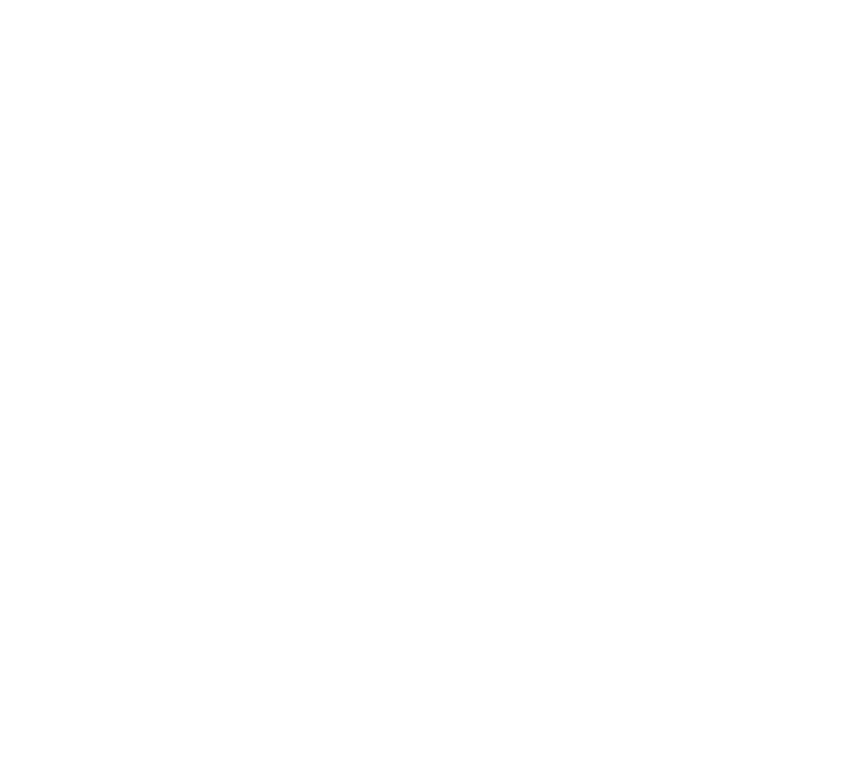

In [22]:
#Once training is over, you need to evaluate the quality of the trained network, briefly, it compares the labels manually annotated by the experimenter
#and the ones predicted by DLC.  The evaluation results are stored in the .h5 and .csv file under the subdirectory 'evaluation_results'.
deeplabcut.evaluate_network(config_path,Shuffles=[1], plotting=True, gputouse=0)

In [27]:
# This cell is used to evaluate novel videos based on the trained network, 
#It is recommended to create a separate folder at "destfolder" to store the plots and results of analysing new videos
#Here instead of analyzing a single video, we might be able to put the video directory and it would analyze all the videos with the indicated video type (I have not tried it, but we should be able to give it a try)
deeplabcut.analyze_videos(config_path, ["C:\DLC_DIFE\Mouse - EVALUATE.mp4"], videotype='mp4', shuffle=1, trainingsetindex=0, gputouse=0, save_as_csv=True, destfolder= r"C:\DLC_DIFE\DLC_DIFE_TEST-Hamid-2023-09-04\NOVEL_VIDEO_RESULTS\\", dynamic=(True, .5, 10))

Using snapshot-50000 for model C:\DLC_DIFE\DLC_DIFE_TEST-Hamid-2023-09-04\dlc-models\iteration-0\DLC_DIFE_TESTSep4-trainset95shuffle1
Starting analysis in dynamic cropping mode with parameters: (True, 0.5, 10)
Switching batchsize to 1, num_outputs (per animal) to 1 and TFGPUinference to False (all these features are not supported in this mode).


C:\ProgramData\Anaconda3\envs\DLCNDF\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Starting to analyze %  C:\DLC_DIFE\Mouse - EVALUATE.mp4
Loading  C:\DLC_DIFE\Mouse - EVALUATE.mp4
Duration of video [s]:  8.53 , recorded with  30.0 fps!
Overall # of frames:  256  found with (before cropping) frame dimensions:  840 742
Starting to extract posture


 98%|████████████████████████████████████████████▉ | 250/256 [03:15<00:04,  1.28it/s]

Saving results in C:\DLC_DIFE\DLC_DIFE_TEST-Hamid-2023-09-04\NOVEL_VIDEO_RESULTS\\...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_resnet50_DLC_DIFE_TESTSep4shuffle1_50000'

In [34]:
#This cell will plot the body parts across the video and store the figures in the destination folder
deeplabcut.plot_trajectories(config_path, ["C:\DLC_DIFE\Mouse - EVALUATE.mp4"], videotype='mp4',shuffle=1, destfolder=r"C:\DLC_DIFE\DLC_DIFE_TEST-Hamid-2023-09-04\NOVEL_VIDEO_RESULTS\\")

Loading  C:\DLC_DIFE\Mouse - EVALUATE.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory


## At this stage you will find .csv files cont